# Random Forest Model for Predicing High Sales on Company Data

In [2]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
#Load the dataset
company_data = pd.read_csv('C:\Data Science\Assignments\Decision Tree\Company_Data.csv')
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company_data.Sales.describe

<bound method NDFrame.describe of 0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64>

In [6]:
#Check for missing values
company_data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [7]:
company_data.shape

(400, 11)

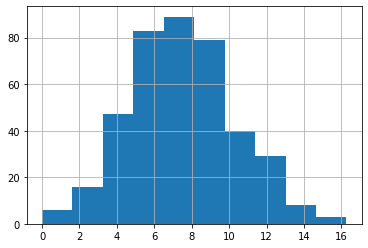

In [8]:
#Histogram of Sales
company_data['Sales'].hist()

In [9]:
# Add a new column named 'Class' # if sales greater than 8 unit sales in thousands then sales is high else Low
company_data['class'] = ['Low' if x <= 8 else 'High' for x in company_data['Sales']] 

# Print the DataFrame 
print(company_data['class'])


0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: class, Length: 400, dtype: object


In [10]:
#Convert this string to numerical
company_data['class'] = company_data['class'].map({'Low': 0, 'High': 1}).astype(int)
print(company_data['class'])


0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: class, Length: 400, dtype: int32


In [11]:
class_counts = company_data.groupby('class').size()
print(class_counts)
company_data.head()
#company_data.shape

class
0    236
1    164
dtype: int64


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


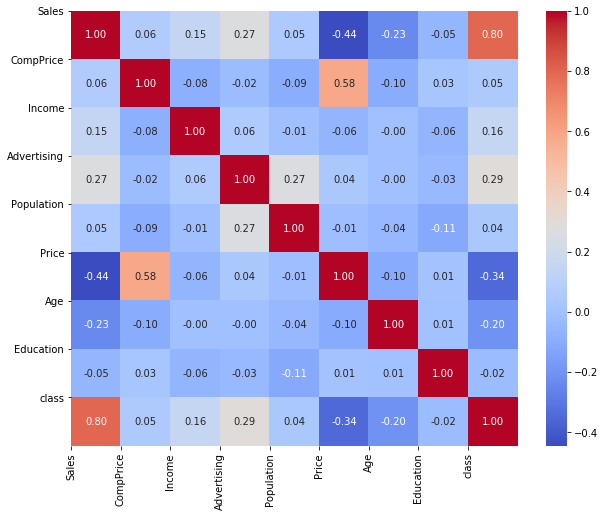

In [12]:
#Data Visualization
corr = company_data.corr()

#Plot
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [14]:
# Let's see how many unique categories we have in these categorical features
shelve_set = set(company_data['ShelveLoc'])
print(shelve_set)

Urban_set = set(company_data['Urban'])
print(Urban_set)

US_set = set(company_data['US'])
print(US_set)

{'Bad', 'Good', 'Medium'}
{'Yes', 'No'}
{'Yes', 'No'}


In [15]:
# Now we map them as integers instead of their names.
company_data['ShelveLoc'] = company_data['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good':2}).astype(int)
print(company_data['ShelveLoc'])

0      0
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    0
399    2
Name: ShelveLoc, Length: 400, dtype: int32


In [16]:
# Now we map them asintegers instead of their names.
company_data['Urban'] = company_data['Urban'].map({'No': 0, 'Yes': 1}).astype(int)
print(company_data['Urban'])

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: Urban, Length: 400, dtype: int32


In [17]:
# Now we map them as integer instead of their names.
company_data['US'] = company_data['US'].map({'No': 0, 'Yes': 1}).astype(int)
print(company_data['US'])

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32


In [18]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
 11  class        400 non-null    int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 31.4 KB


In [19]:
# separate array into input and output components, skipping Sales Column as it is converted to Class
X = company_data.iloc[:,1:11].values
Y = company_data.iloc[:,11].values
names = company_data.iloc[:,0:12].columns

#Splitting the dataset into training and test data-set
# Evaluate using a train and a test set
from sklearn.model_selection import train_test_split
test_size = 0.30
seed = 8
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[159  80   0 ...  18   1   0]
 [135  93   2 ...  11   1   1]
 [134  48   1 ...  12   1   1]
 ...
 [132  98   2 ...  12   1   1]
 [131  25  10 ...  15   0   1]
 [140  29   0 ...  16   1   0]]
[[149  69  20 ...  13   1   1]
 [136 119   6 ...  13   1   1]
 [109  64  13 ...  17   1   1]
 ...
 [108  77  13 ...  14   1   1]
 [147  40   0 ...  10   1   0]
 [117  93   4 ...  11   1   1]]
[1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0]
[1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 

In [20]:
#Feature Scaling
#Data Normalization
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# summarize transformed data
set_printoptions(precision=3)
print(X_train[0:11,:])
print(X_test[0:11,:])

[[ 2.22   0.428 -1.014  0.695  0.213  0.005 -1.722  1.506  0.671 -1.418]
 [ 0.659  0.887 -0.704 -1.314  0.131  0.005 -1.231 -1.081  0.671  0.705]
 [ 0.594 -0.704 -0.859 -0.824  1.198  0.005  0.671 -0.712  0.671  0.705]
 [ 1.179  0.322  2.86   1.28   1.65   0.005 -0.678  1.137  0.671  0.705]
 [-0.447  0.781  0.536 -1.403 -0.485  1.49  -1.415 -1.081 -1.489  0.705]
 [-0.382  1.064 -1.014 -1.648  0.418 -1.48   1.162  1.137 -1.489 -1.418]
 [-0.773 -1.234 -1.014 -1.675 -2.169  1.49  -0.985 -0.712  0.671 -1.418]
 [-1.423  0.463 -0.549  1.573 -2.538  0.005  0.733 -0.342  0.671 -1.418]
 [ 1.114  0.781 -0.859 -0.483 -0.157  1.49  -0.924 -1.451 -1.489  0.705]
 [ 0.073 -1.269  0.226 -1.124  0.665  0.005 -0.249  1.137  0.671  0.705]
 [-0.122 -1.093  1.31   0.599 -0.157  1.49  -1.599 -0.712  0.671  0.705]]
[[ 1.57   0.039  2.085  0.722  0.747  1.49   0.365 -0.342  0.671  0.705]
 [ 0.724  1.807 -0.084 -0.558  1.198  0.005 -1.169 -0.342  0.671  0.705]
 [-1.033 -0.138  1.    -1.505  0.131  0.005  0.426

In [21]:
#Printing the features
names = company_data.iloc[:,1:11].columns

print(X_train.shape)
print(X_test.shape)
print(names)

(280, 10)
(120, 10)
Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


In [34]:
#Random Forest
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


#Random Forest clssifer: it is a ensemble of Decision tree 
rf = RandomForestClassifier(random_state=10) # n_estimator number of tree in the forest 
rf.fit(X_train,Y_train) #fitting the random forest model 
y_pred = rf.predict(X_test)


#Printing Random Forest Attributes
print("How many Decision Trees",len(rf.estimators_))
print("No of Features",rf.n_features_)
print("Feature Importance",rf.feature_importances_)
print("No of Outputs when fit performed",rf.n_outputs_)



rfscoreT = rf.score(X_train,Y_train) #doing the accuracy of the train model 
print("RF train Accuracy", rfscoreT)

rfscore = rf.score(X_test,Y_test) #doing the accuracy of the test model 
print("RF Test Accuracy", rfscore)

cn = confusion_matrix(Y_test, y_pred)
print("RF Confusion", cn)
print("************************")

# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(rf, X_test, Y_test, cv=10, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

How many Decision Trees 100
No of Features 10
Feature Importance [0.117 0.102 0.131 0.072 0.235 0.126 0.135 0.048 0.014 0.019]
No of Outputs when fit performed 1
RF train Accuracy 1.0
RF Test Accuracy 0.8416666666666667
RF Confusion [[65  7]
 [12 36]]
************************

[0.583 0.917 1.    1.    0.917 0.833 0.833 0.583 0.833 0.833]

0.8333333333333334

0.13944333775567924


In [35]:
#Decicing on the Best Hyper Parameters for RandomForest using RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create a RandomForest
est = RandomForestClassifier(n_jobs=-1, random_state=10)

# Create a dictionary of all the parameter options 
rf_p_dist={'max_depth':[3,4,5,6,7,8,9,10,None],
           'n_estimators':[100,200,300,400],
           'max_features':randint(1,10),
           'criterion':['gini','entropy'],
           'bootstrap':[True,False],
           'oob_score':[False,True],
           'min_samples_leaf':randint(1,8)}


#Function to get different Hyperparameters using RandomizedSearchCV
def hypertuning_rscv(est, p_distr, nbr_iter, X,Y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr, n_jobs=-1, n_iter=nbr_iter, cv=10)
    rdmsearch.fit(X,Y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

#Calling the function 
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_train,Y_train)

# View The Best Parameters
print('Best Parameters:', rf_parameters)
print(); print("best Score:", rf_ht_score)


#Observation - RandomizedSearchCV has better performance compared to GridSearchCV and can be used especially if there are more features

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 6, 'n_estimators': 400, 'oob_score': False}

best Score: 0.7964285714285714


In [36]:
#Finalize Best Model with the best hyperparameters
classifier=RandomForestClassifier(n_jobs=-1, bootstrap=True, criterion='gini', 
                                  max_depth=7, max_features=2, min_samples_leaf=6,
                                  n_estimators=400,oob_score=False,random_state=10)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cn = confusion_matrix(Y_test, y_pred)

score = classifier.score(X_test,Y_test)
print("Model Test Accuracy", score)

score1 = classifier.score(X_train,Y_train)
print("Model Train Accuracy", score1)

print("Confusion Matrix", cn)


#Printing Random Forest Attributes
print("How many Decision Trees",len(classifier.estimators_))
print("Feature Importance",classifier.feature_importances_)
print("No of Outputs when fit performed",classifier.n_outputs_)
#print("OOB Score",classifier.oob_score_)

# Use Cross Validation To Evaluate Model
cross_val = cross_val_score(classifier, X_test, Y_test, cv=10, scoring='accuracy')
print(); print(cross_val)
print(); print(cross_val.mean())
print(); print(cross_val.std())

##Observations
####The accuracy of this model has improved from 83.33% to 85#

Model Test Accuracy 0.85
Model Train Accuracy 0.9428571428571428
Confusion Matrix [[67  5]
 [13 35]]
How many Decision Trees 400
Feature Importance [0.085 0.094 0.145 0.059 0.239 0.16  0.146 0.038 0.012 0.021]
No of Outputs when fit performed 1

[0.75  0.833 0.917 0.833 0.833 0.75  0.833 0.583 0.75  0.917]

0.8

0.09279607271383368


[Text(355.72499999999997, 509.625, 'X[2] <= -0.084\ngini = 0.489\nsamples = 172\nvalue = [161, 119]'),
 Text(100.44, 441.675, 'X[4] <= -1.019\ngini = 0.404\nsamples = 85\nvalue = [100, 39]'),
 Text(66.96, 373.725, 'gini = 0.291\nsamples = 10\nvalue = [3, 14]'),
 Text(133.92, 373.725, 'X[6] <= -1.016\ngini = 0.326\nsamples = 75\nvalue = [97, 25]'),
 Text(66.96, 305.775, 'X[4] <= 0.357\ngini = 0.486\nsamples = 15\nvalue = [10, 14]'),
 Text(33.48, 237.825, 'gini = 0.444\nsamples = 9\nvalue = [5, 10]'),
 Text(100.44, 237.825, 'gini = 0.494\nsamples = 6\nvalue = [5, 4]'),
 Text(200.88, 305.775, 'X[3] <= 0.93\ngini = 0.199\nsamples = 60\nvalue = [87, 11]'),
 Text(167.39999999999998, 237.825, 'X[0] <= -0.22\ngini = 0.137\nsamples = 49\nvalue = [75, 6]'),
 Text(133.92, 169.875, 'gini = 0.0\nsamples = 18\nvalue = [33, 0]'),
 Text(200.88, 169.875, 'X[7] <= -0.527\ngini = 0.219\nsamples = 31\nvalue = [42, 6]'),
 Text(167.39999999999998, 101.92500000000001, 'gini = 0.0\nsamples = 12\nvalue = [19, 

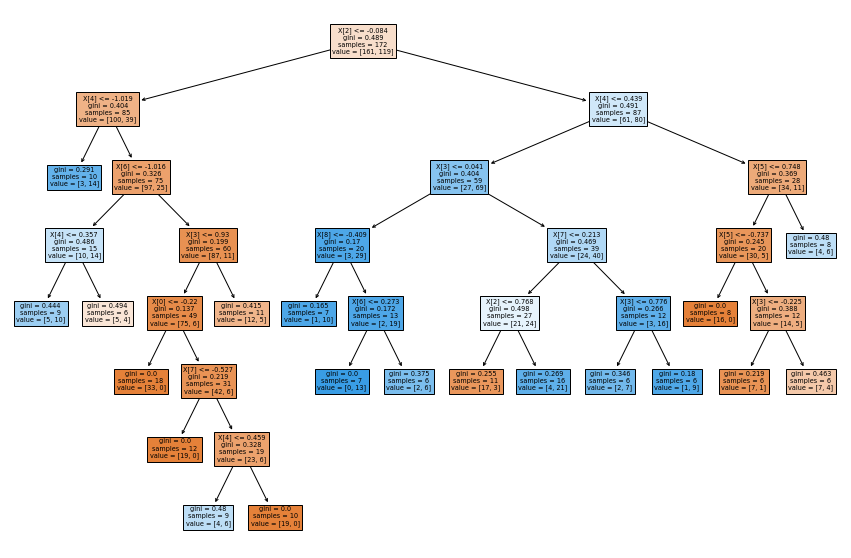

In [37]:
#Graphical Representation of 100th Decision Tree (estimator_[399])
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier.estimators_[399],filled=True)